In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
from cosamp import cosamp

## Signal generation

In [3]:
n = 4096 # sample rate of high resolution signal
t = np.linspace(0, 1, n)
f1 = 70
f2 = 700
x = np.cos(2 * np.pi * f1 * t) + 0.5 * np.cos(2 * np.pi * f2 * t)
x_fft = np.fft.fft(x)
x_PSD = np.abs(x_fft * np.conj(x_fft)) / n

## random sampling

In [4]:
p = 128 # number of random samples
perm = np.floor(np.random.rand(p) * n).astype(int)
y = x[perm]

## plot time- and PSD-signal

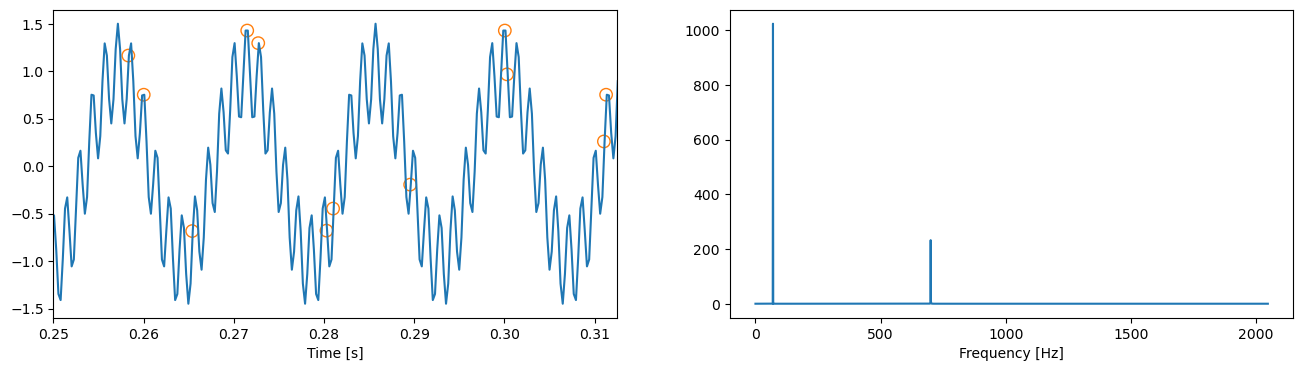

In [9]:
# compare linear sampling with too low sampling frequency to reconstruct the signal
# p_lin = 128
# perm_lin = np.linspace(0, n-1, p_lin).astype(int)
# y_lin = x[perm_lin]
# x_lin = np.zeros(n)
# x_lin[perm_lin] = x[perm_lin]
# x_lin_fft = np.fft.fft(x_lin)
# x_lin_PSD = np.abs(x_lin_fft * np.conj(x_lin_fft)) / n

time_window = np.array([1024, 1280]) / n
freq = np.arange(n)
L = int(np.floor(n/2))

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(t, x)
axs[0].scatter(perm/n, y, s=80, edgecolors='C1', facecolors='none')
# axs[0].scatter(perm_lin/n, y_lin, s=80, edgecolors='k', facecolors='none')
axs[0].set_xlim(time_window[0], time_window[1])
axs[0].set_xlabel('Time [s]')

axs[1].plot(freq[:L], x_PSD[:L])
axs[1].set_xlabel('Frequency [Hz]')

plt.show()

## Compressed Sensing

In [6]:
psi = dct(np.identity(n))
theta = psi[perm, :]

s = cosamp(theta, y, 10, max_iter=10)
x_recon = idct(s) # reconstruction

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


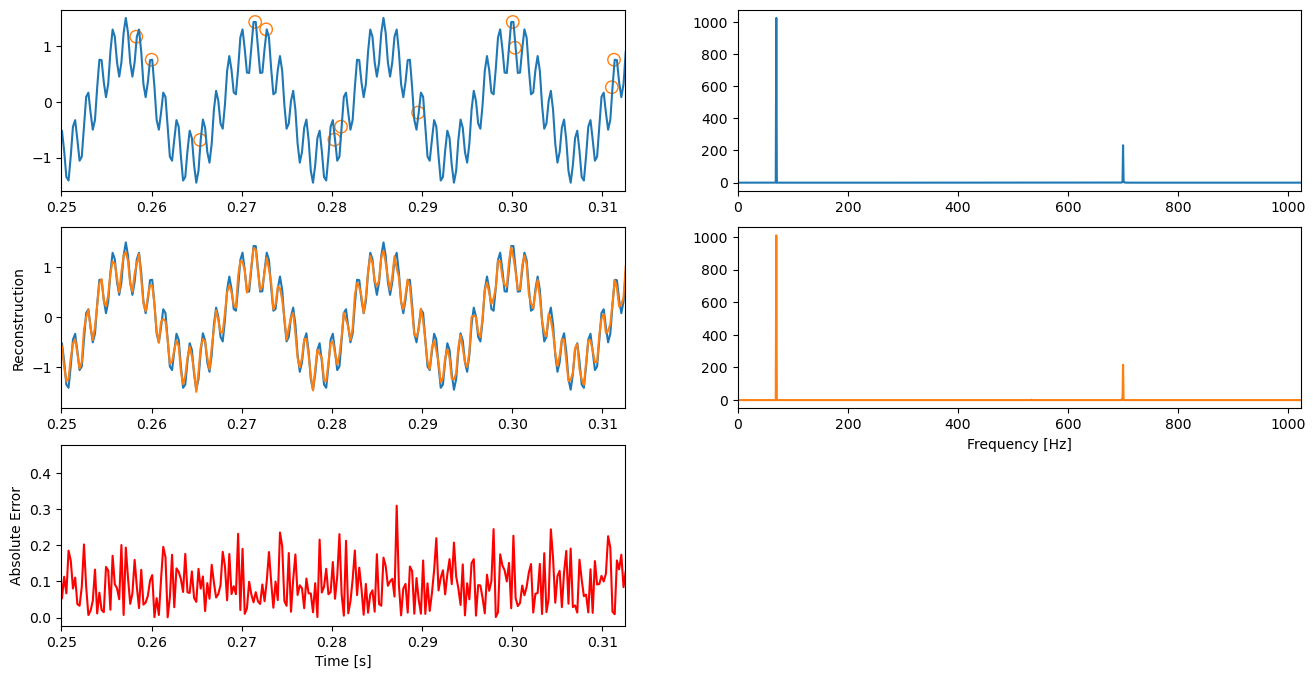

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(16, 8))

axs[0][0].plot(t, x)
axs[0][0].scatter(perm/n, y, s=80, edgecolors='C1', facecolors='none')
axs[0][0].set_xlim(time_window[0], time_window[1])

axs[0][1].plot(freq[:L], x_PSD[:L])
axs[0][1].set_xlim(0, 1024)

axs[1][0].plot(t, x)
axs[1][0].plot(t, x_recon)
axs[1][0].set_xlim(time_window[0], time_window[1])
axs[1][0].set_ylabel('Reconstruction')

x_recon_fft = np.fft.fft(x_recon, n)
x_recon_PSD = np.abs(x_recon_fft * np.conj(x_recon_fft)) / n

axs[1][1].plot(freq[:L], x_recon_PSD[:L], color='C1')
axs[1][1].set_xlim(0, 1024)
axs[1][1].set_xlabel('Frequency [Hz]')

axs[2][0].plot(t, np.abs(x - x_recon), color='r')
axs[2][0].set_xlim(time_window[0], time_window[1])
axs[2][0].set_xlabel('Time [s]')
axs[2][0].set_ylabel('Absolute Error')

axs[2][1].set_visible(False)
plt.show()